Nama : Nabila Aprillia

NPM  : 2108107010025

SVM

### Dataset

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Deskripsi Singkat:
Dataset ini merupakan data tentang kanker payudara yang berasal dari Breast Cancer Wisconsin (Diagnostic) Dataset. 

Studi Kasus : Dataset ini memprediksi apakah jenis kanker tersebut bersifat ganas (kanker)/M (Maglinant) atau jinak (bukan kanker)/ B (Benign). 

### Import Library

In [1]:
# import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Statistics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


### Exploratory data Analysis 

In [3]:
data_raw = pd.read_csv(r"data/breast-cancer.csv")
data_raw.head().transpose()

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data_raw.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000,869218.000,906024.000,8813129.000,9.113205e+08
radius_mean,569.0,1.412700e+01,3.524000e+00,6.981,11.700,13.370,15.780,2.811000e+01
texture_mean,569.0,1.929000e+01,4.301000e+00,9.710,16.170,18.840,21.800,3.928000e+01
perimeter_mean,569.0,9.196900e+01,2.429900e+01,43.790,75.170,86.240,104.100,1.885000e+02
area_mean,569.0,6.548890e+02,3.519140e+02,143.500,420.300,551.100,782.700,2.501000e+03
smoothness_mean,569.0,9.600000e-02,1.400000e-02,0.053,0.086,0.096,0.105,1.630000e-01
compactness_mean,569.0,1.040000e-01,5.300000e-02,0.019,0.065,0.093,0.130,3.450000e-01
concavity_mean,569.0,8.900000e-02,8.000000e-02,0.000,0.030,0.062,0.131,4.270000e-01
concave points_mean,569.0,4.900000e-02,3.900000e-02,0.000,0.020,0.034,0.074,2.010000e-01
symmetry_mean,569.0,1.810000e-01,2.700000e-02,0.106,0.162,0.179,0.196,3.040000e-01


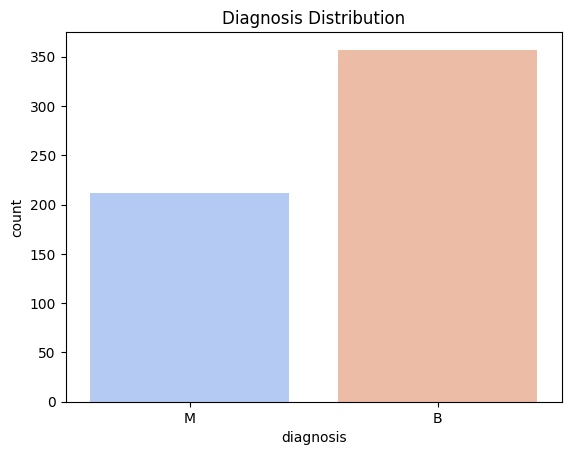

In [6]:
sns.countplot(data=data_raw, x='diagnosis', palette='coolwarm')
plt.title('Diagnosis Distribution')
plt.show()

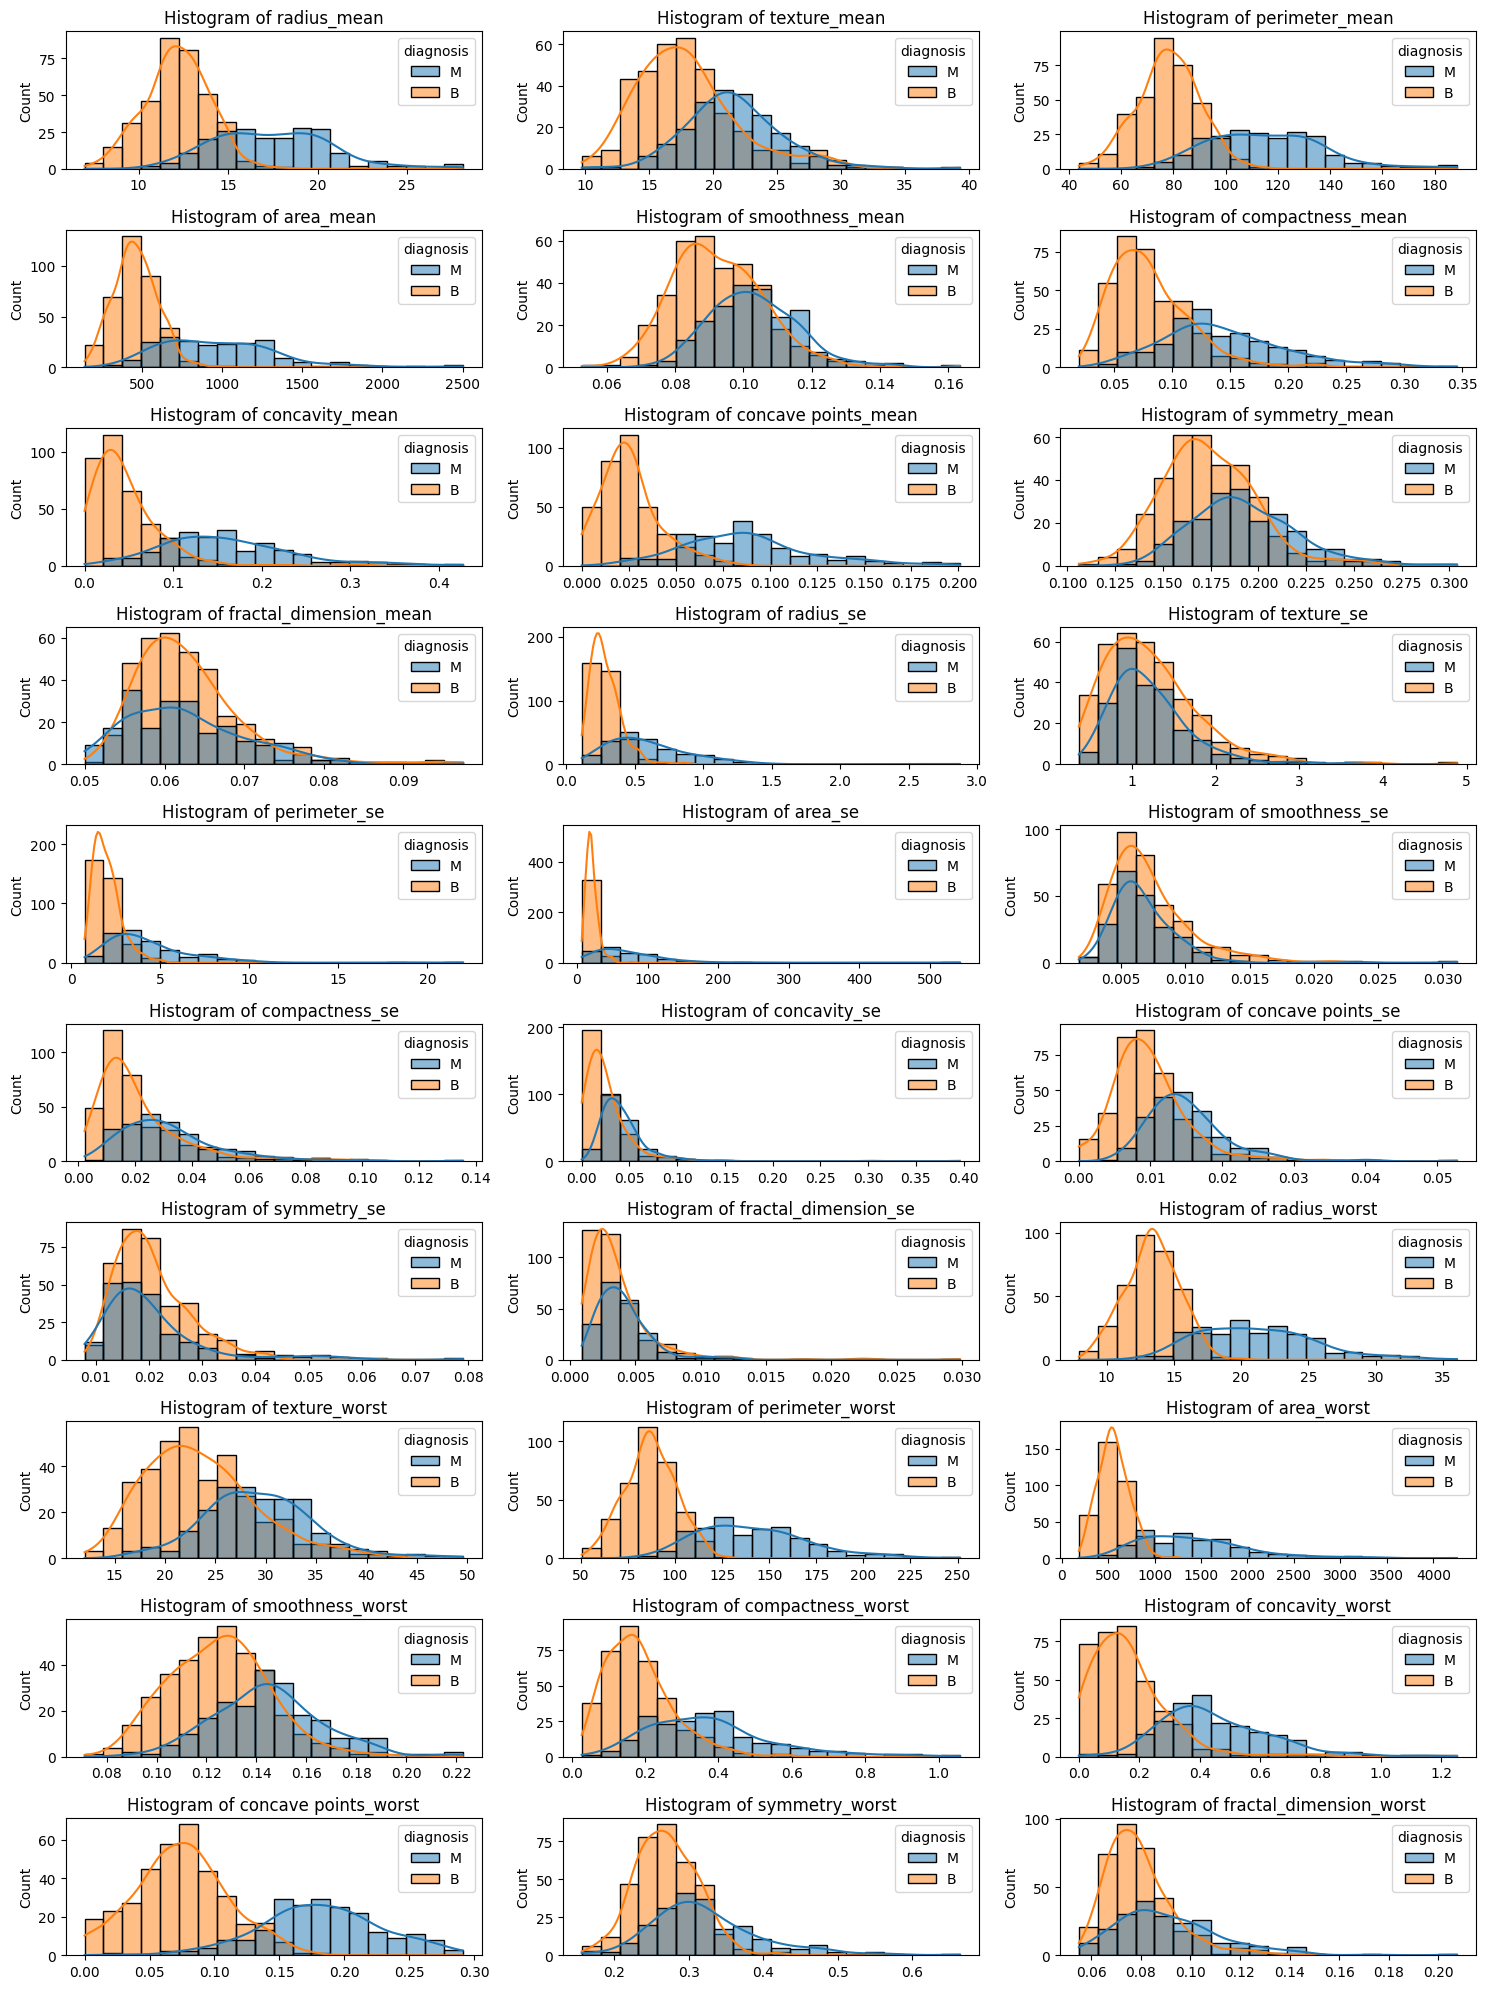

In [7]:
data = data_raw.drop('id', axis =1)

fig, axes = plt.subplots(nrows=len(data.columns) // 3, ncols=3, figsize=(15, 20))
axes = axes.flatten()  


for i, col in enumerate(data.select_dtypes(include='number').columns):
    sns.histplot(data=data, x=col, hue='diagnosis', ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('')


plt.tight_layout()
plt.show()

### Data Prepocessing

In [8]:
data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

### Membangun Model

In [11]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scale, y_train)

y_pred = svm_model.predict(X_test_scale)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Model klasifikasi SVM mencapai akurasi yang mengesankan sebesar 98% pada data uji. Ini menunjukkan bahwa model tersebut berhasil mengklasifikasikan sebagian besar contoh ke dalam kelas mereka masing-masing (Ganas atau Jinak).

kita dapat melihat bahwa presisi, recall, dan F1-score cukup tinggi untuk kedua kelas (Ganas dan Jinak). Untuk kelas Jinak (B), presisi, recall, dan F1-score semuanya di atas 0,98, menunjukkan kinerja tinggi dalam mengidentifikasi kasus Jinak dengan benar. Begitu juga, untuk kelas Ganas (M), presisi, recall, dan F1-score juga tinggi, menunjukkan kinerja yang kuat dalam mengidentifikasi kasus Ganas

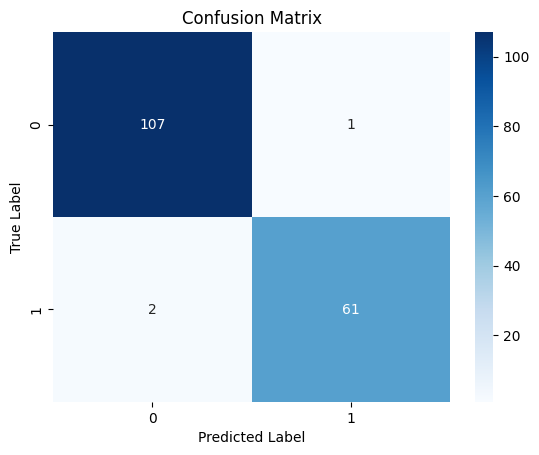

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

confusion matrix dan rata-rata tertimbang juga menunjukkan nilai tinggi, menunjukkan kinerja seimbang di kedua kelas.

In [13]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5],
    'class_weight': [None, 'balanced'],
    'shrinking': [True, False],
    'probability': [True, False]
}

svm = SVC(random_state = 42)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scale, y_train)

best_params = grid_search.best_params_

In [14]:
svm = SVC(**best_params, random_state = 42)
svm.fit(X_train_scale, y_train)
y_pred = svm.predict(X_test_scale)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       108
           M       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



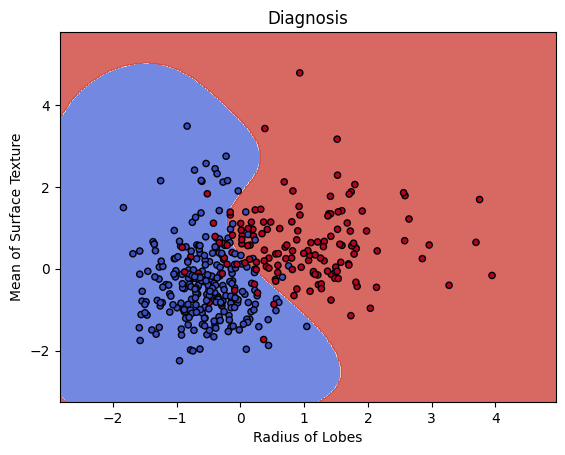

In [22]:

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Radius of Lobes')
    plt.ylabel('Mean of Surface Texture')
    plt.title('Diagnosis')
    plt.show()

# Convert label to numeric
y_train_numeric = y_train.map({'M': 1, 'B': 0})
y_test_numeric = y_test.map({'M': 1, 'B': 0})

# Fit SVM model with only two features
svm_model_2d = SVC(kernel='rbf', random_state=42)
svm_model_2d.fit(X_train_scale[:, :2], y_train_numeric)

# Plot decision boundary
plot_decision_boundary(svm_model_2d, X_train_scale[:, :2], y_train_numeric) 
# Fit SVM model with only two features

